In [1]:
#IMPORTACIÓN DE LIBRERÍAS PERTINENTES
%matplotlib ipympl
#What does this mean and why can't I comment in front of it? [?]

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from scipy import integrate

c:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#CARACTERIZACIÓN DEL SISTEMA
N_0 = np.array([500.,0.,0.]) #A,B,C

lambda_a = 0.5 #partículas / h
lambda_b = 0.3 #partículas / h

t = np.linspace(0,10,50) # t de 0 a 10 horas en 50 pasos temporales

In [3]:
#A. SISTEMA DE ECUACIONES DIFERENCIALES > CADENAS DE DESINTEGRACIÓN ENTRE LAS PARTÍCULAS

def System (N,t,lambda_a,lambda_b): 

    NA, NB, NC = N

    dNAdt = -lambda_a*NA
    dNBdt = lambda_a*NA - lambda_b*NB
    dNCdt = lambda_b*NB
    
    return np.array([dNAdt, dNBdt, dNCdt])

In [4]:
solución_mejorada = integrate.odeint(System, N_0, t, args=(lambda_a,lambda_b))

In [5]:
def Increment(f,N,t,h,lambda_a,lambda_b):
    
    state1 = np.array([N[0],N[1],N[2]])
    K1 = f(state1,t,lambda_a,lambda_b)
    
    state2 = np.array([N[0]+0.5*h*K1[0],N[1]+0.5*h*K1[1],N[2]+0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h,lambda_a,lambda_b)
    
    state3 = np.array([N[0]+0.5*h*K2[0],N[1]+0.5*h*K2[1],N[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h,lambda_a,lambda_b)
    
    state4 = np.array([N[0]+h*K3[0],N[1]+h*K3[1],N[2]+h*K3[2]])
    K4 = f(state4,t+h,lambda_a,lambda_b)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return N+Deltaf

In [6]:
def Adaptativo(f,r0,t,lambda_a,lambda_b,e=1e-4):
    
    h = t[1] - t[0]
    
    tf = t[-1]
    t = t[0]
    
    r = r0

    Time = np.array([t])
    Vector = r
    #Steps = np.array([h])

    while t < tf:
         # Avance h desde el punto actual
         r1 = Increment(f,r,t,h,lambda_a,lambda_b)
         # Avance h desde el siguiente punto
         r2 = Increment(f,r1,t+h,h,lambda_a,lambda_b)
         # Avance 2h desde el punto actual
         rt = Increment(f,r,t,2*h,lambda_a,lambda_b)

         # El error es comparar los avances
         # ->h->h y->2h en sus componentes
         error = np.linalg.norm( r2- rt )

         # Si el error es menor que la tolerancia (e)-> avanzo 2h
         if error < e:
               t += 2*h
               r = rt
               #Llene vectores
               #Steps = np.append(Steps,h)
               Time = np.append(Time,t)
               Vector = np.vstack((Vector,r))
         
         # Si el error es muy grande, cambie el paso
         # Según Fehlberg
         q = 0.85*(e/error)**(1/4)
         h = h*q

    return Time, Vector[:,0], Vector[:,1], Vector[:,2]

In [7]:
t1,NA,NB,NC = Adaptativo(System,N_0,t,lambda_a,lambda_b)
print(len(t1))

38


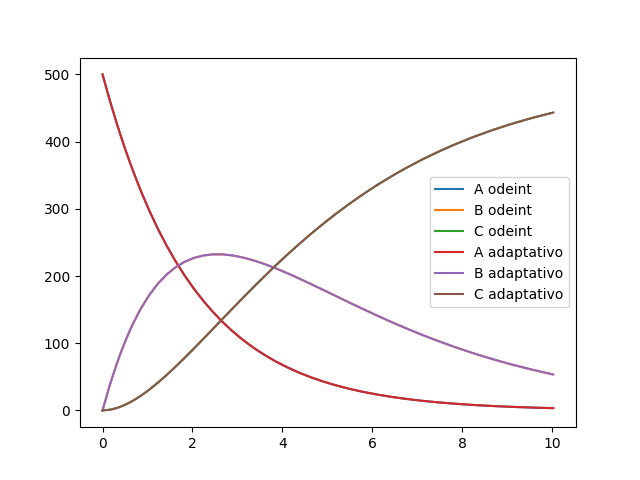

In [8]:
plt.plot(t,solución_mejorada[:,0],label="A odeint")
plt.plot(t,solución_mejorada[:,1],label="B odeint")
plt.plot(t,solución_mejorada[:,2],label="C odeint")
plt.plot(t1,NA,label="A adaptativo")
plt.plot(t1,NB,label="B adaptativo")
plt.plot(t1,NC,label="C adaptativo")
plt.legend()

In [13]:
NB_MAX = np.max(NB)
posición_NB_MAX = np.where(NB == np.amax(NB))
t_NB_MAX = t1[13]
NC_NB_MAX = NC[13]

print("EL TIEMPO EN QUE NB ES MÁXIMO ES: " + str(t_NB_MAX) + ", EL NÚMERO DE PARTÍCULAS B ES: " + str(NB_MAX) + ", Y EL NÚMERO DE PARTÍCULAS C ES: " + str(NC_NB_MAX))

EL TIEMPO EN QUE NB ES MÁXIMO ES: 2.4520362395696504, EL NÚMERO DE PARTÍCULAS B ES: 232.1920182235683, Y EL NÚMERO DE PARTÍCULAS C ES: 121.0784558565119
